In [139]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

I =∫(od a do b) f(x) dx = (b − a)* f(str.)


Výpočet střední hodnoty funkce:

MC - nahod vel ξ - rovn rozl na <a,b>

I = (b-a) * 1/n Σ f(ξi)

In [140]:
def f_ce(x):
    return np.exp(x)

def metoda_stredni_hodnoty(pocet_rozlozeni):
    start = time.time()

    a,b = 0, 5
    
    hodnota_fce = 0
    for i in range(pocet_rozlozeni):
        nahodny_x = random.uniform(a,b) 
        hodnota_fce += f_ce(nahodny_x)

    integral = (b-a)* (1/pocet_rozlozeni) * hodnota_fce
    
    return integral, time.time()-start

Geometrická metoda:
ξ <a,b>, η <0,c>,    najit omezeni vysky a pak nahodne strelit do obdelniku
I = c * (b-a) * (η' /η)

In [141]:
def geometricka_metoda(pocet_rozlozeni):

    a,b = 0, 5
    e = np.linspace(a,b,pocet_rozlozeni)

    nej_vys_vyska = 0
    for i in range(len(e)):
        vyska = f_ce(e[i])
        if vyska > nej_vys_vyska:
            nej_vys_vyska = vyska
            
    start = time.time()
    trefa = 0   
    for i in range(pocet_rozlozeni):
        nahodny_x = random.uniform(float(a), float(b))
        nahodny_y = random.uniform(0.0, nej_vys_vyska)
        vyska = f_ce(nahodny_x)
        
        if nahodny_y < vyska: trefa += 1

    integral = nej_vys_vyska * (b - a) * (trefa / pocet_rozlozeni)

    return integral, time.time() - start

In [142]:
pocet_iteraci = [100, 1000, 10000, 100000, 1000000]
presnost_str = [] 
presnost_geo = []
casova_narocnost_str = []
casova_narocnost_geo = []

for iterace in pocet_iteraci:
    p_str, cas_str = metoda_stredni_hodnoty(iterace)
    presnost_str.append(p_str)
    casova_narocnost_str.append(cas_str)
    
    p_geo, cas_geo = geometricka_metoda(iterace)
    presnost_geo.append(p_geo)
    casova_narocnost_geo.append(cas_geo)

In [143]:
print(f"Prestnost geometr metody{presnost_geo} \n")
print(f"Prestnost stredni metody{presnost_str} \n")

print(casova_narocnost_geo)

print(casova_narocnost_str)

Prestnost geometr metody[178.09579092309193, 144.70283012501218, 149.7488775344998, 149.65982963903824, 147.89742337469517] 

Prestnost stredni metody[172.42500141900794, 144.36386058307195, 145.35219408338318, 148.04783422713774, 147.60496398983778] 

[0.0, 0.0020024776458740234, 0.02599930763244629, 0.23600029945373535, 2.404215097427368]
[0.0, 0.0020034313201904297, 0.018997907638549805, 0.20399856567382812, 1.9473624229431152]


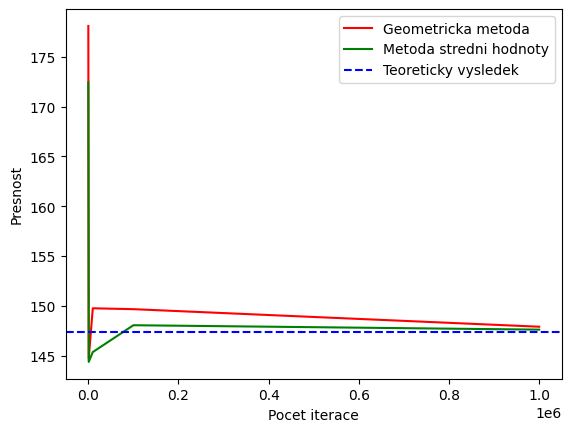

In [144]:
plt.xlabel("Pocet iterace")
plt.ylabel("Presnost")
plt.plot(pocet_iteraci, presnost_geo, color = "red", label = "Geometricka metoda")
plt.plot(pocet_iteraci, presnost_str, color = "green", label = "Metoda stredni hodnoty")
plt.axhline(y = 147.41316, color = 'blue', linestyle = '--', label = "Teoreticky vysledek") 
plt.legend()
plt.show()

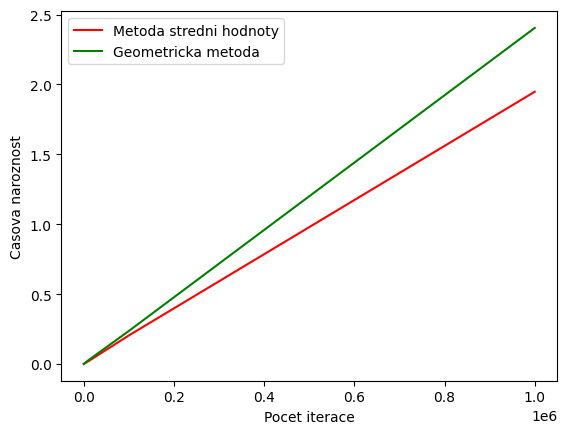

: 

In [145]:
plt.xlabel("Pocet iterace")
plt.ylabel("Casova naroznost")
plt.plot(pocet_iteraci, casova_narocnost_str, color = "red", label = "Metoda stredni hodnoty")
plt.plot(pocet_iteraci, casova_narocnost_geo, color = "green", label = "Geometricka metoda")
plt.legend()
plt.show()

Srovnání obou metod ukazuje, že metody stejne. Geo metoda ma vetsi rozptyl nez metoda stredni hodnoty. O preatnosti by mohlo rikat celková doba potřebná k
dosažení dané přesnosti.   